In [2]:
from math import factorial

In [3]:
def coinflip_prob(n, k):
    n_choose_k = factorial(n) / (factorial(n-k) * factorial(k))
    return n_choose_k / 2 ** n

In [4]:
[coinflip_prob(5, i) for i in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

In [5]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Law of Large Numbers - given a fair coin and a large number of flips, it should land 50% of the time on heads which is the expected probability.

In [13]:
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])

In [14]:
np.random.seed(42)

In [15]:
np.random.binomial(1, 0.5)

0

In [16]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [19]:
proportion_heads = heads_count / ns
proportion_heads

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

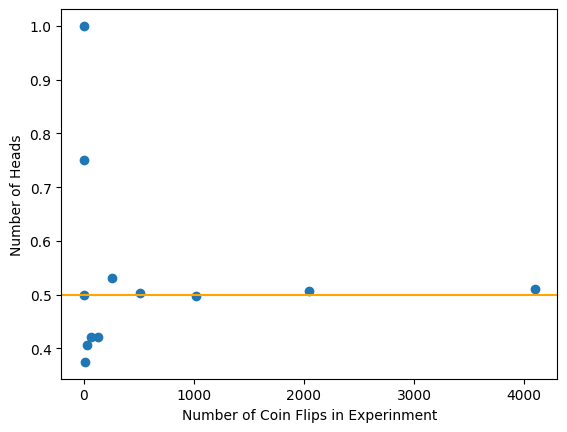

In [21]:
fig, ax = plt.subplots()
plt.xlabel('Number of Coin Flips in Experinment')
plt.ylabel('Number of Heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

Statistics - applies probability theory to make inferences with a quantifiable degree of confidence. 

In [22]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

Now I create a Probability Distribution:

In [23]:
heads, event_count = np.unique(heads_count, return_counts = True)
heads

array([0, 1, 2, 3, 4, 5])

In [24]:
event_count

array([ 33, 181, 285, 313, 160,  28])

In [25]:
event_proba = event_count / n_experiments
event_proba

array([0.033, 0.181, 0.285, 0.313, 0.16 , 0.028])

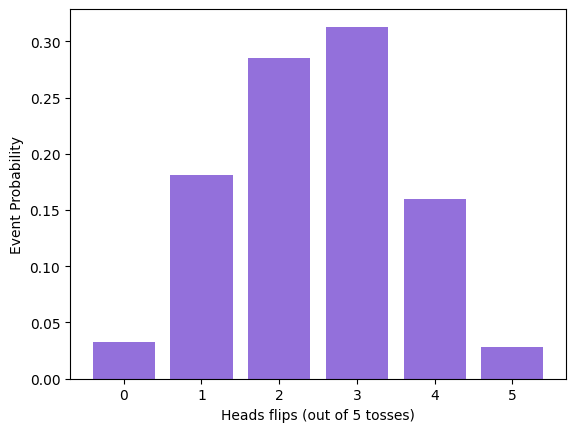

In [26]:
plt.bar(heads, event_proba, color = 'mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event Probability')

Expected Values

In [27]:
P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

Equation for Expected Value - E = sum of (x * probability of x)

In [28]:
E = sum([P[x] * x for x in range(6)])
E

2.5

Measures of Central Tendency - provide a summary statistic on the center of a given distribution, meaning the average value of the distribution.

Mean - the some of the samples divided by the number of values in the population.

In [29]:
len(heads_count)

1000

In [30]:
heads_count[0:20]

array([2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2])

In [31]:
sum(heads_count) / len(heads_count)

2.47

In [32]:
np.mean(heads_count)

2.47

In [33]:
np.median(heads_count)

3.0

In [34]:
st.mode(heads_count)

ModeResult(mode=3, count=313)

In [35]:
x = st.skewnorm.rvs(0, size = 1000)

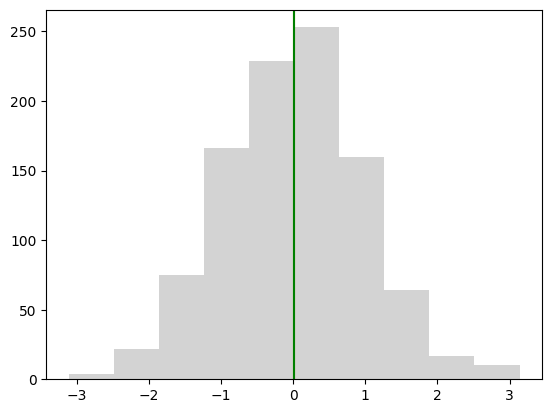

In [36]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

In [37]:
x = st.skewnorm.rvs(10, size=1000)

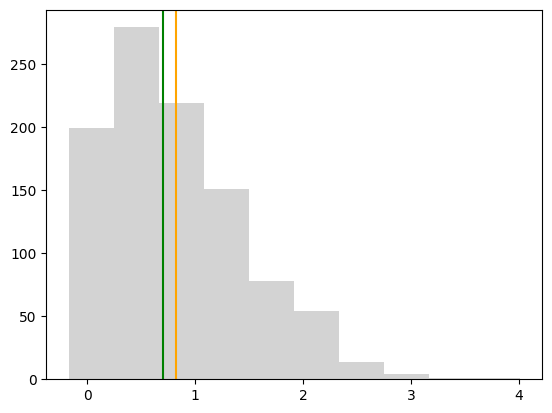

In [38]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

In [39]:
np.median(x)

0.6987365121323832

In [40]:
np.quantile(x, 0.5)

0.6987365121323832

In [41]:
p = np.percentile(x, [95, 99])
p

array([2.06249928, 2.51830108])

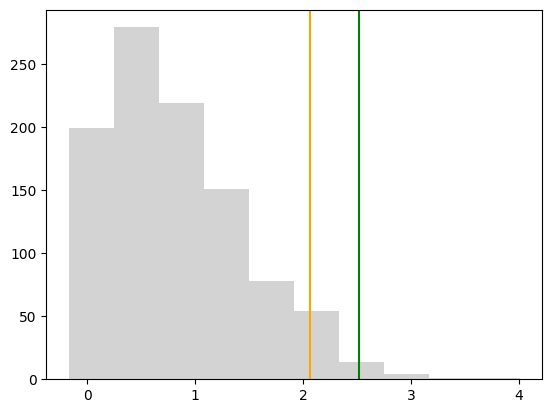

In [42]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='green')
_ = plt.hist(x, color = 'lightgray')

In [43]:
q = np.percentile(x, [25, 50, 75])
q

array([0.32494046, 0.69873651, 1.19431522])

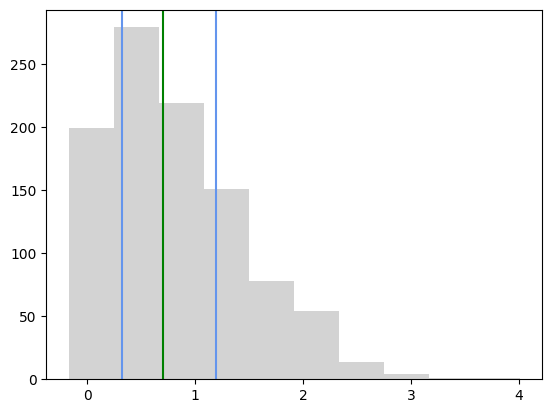

In [44]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

In [45]:
[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [46]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

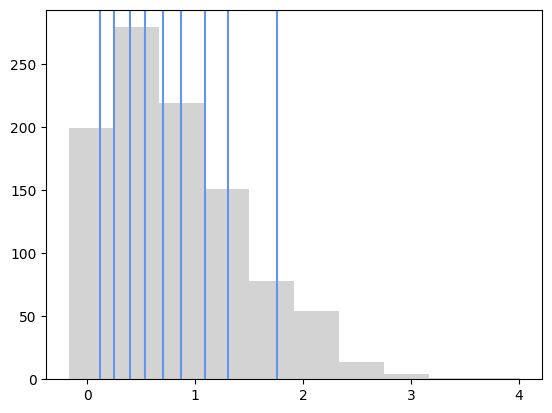

In [47]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgrey')

The Box-and-Whisker Plot

In [48]:
sns.set(style='whitegrid')

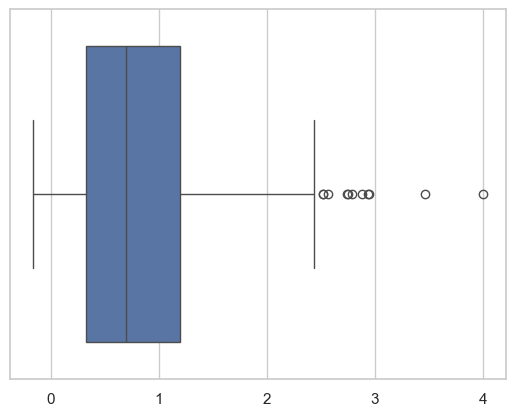

In [49]:
_ = sns.boxplot(x=x)

In [50]:
q

array([0.32494046, 0.69873651, 1.19431522])

In [51]:
r = 1.166 - 0.324
r

0.8419999999999999

Whisker lengths are determined by furtherst data points within 1.5 x IQR of the box edges.

In [52]:
0.324 - 1.5 * r

-0.9389999999999998

In [53]:
np.min(x)

-0.17083838831568182

In [54]:
1.166 + 1.5 * r

2.429

In [55]:
x.sort()

In [56]:
x[-20:]

array([2.34651404, 2.36764657, 2.37399706, 2.39018381, 2.39363782,
       2.39810074, 2.40295599, 2.41430044, 2.43541111, 2.51827951,
       2.52043572, 2.56177972, 2.74024547, 2.74882884, 2.78877435,
       2.88399304, 2.93368541, 2.94293176, 3.46465001, 4.00641863])

In [57]:
import seaborn as sns

In [58]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


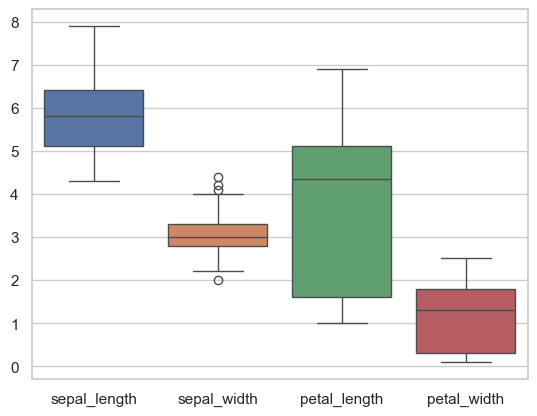

In [60]:
_ = sns.boxplot(data=iris)

In [61]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


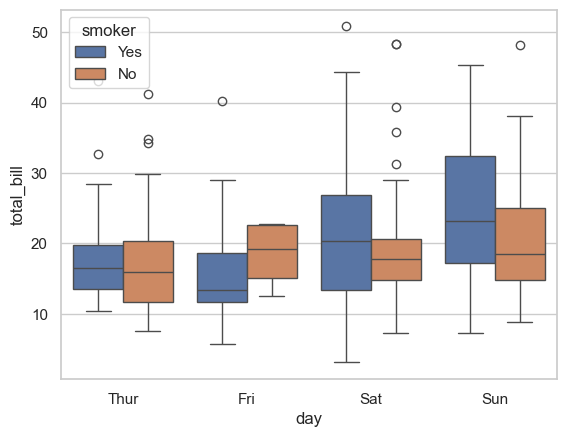

In [62]:
_ = sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)

Variance - sum of the difference between the individual point compared to the mean squared divided by the total number. 

In [63]:
xbar = np.mean(x)
xbar

0.8219573880882259

In [64]:
squared_differences = [(x_i - xbar) ** 2 for x_i in x]

In [67]:
squared_differences[0:10]

[0.9856434536454379,
 0.9170226052916489,
 0.8965181282231266,
 0.8883307031718269,
 0.8733501430824243,
 0.8562478309191935,
 0.8319771034452769,
 0.8310929040089835,
 0.7863402041234238,
 0.7766155393407362]

In [66]:
sigma_squared = sum(squared_differences) / len(x)
sigma_squared

0.39813585982250543

In [68]:
np.var(x)

0.3981358598225057

 Standard Deviatrion - a value to determine how much variance in the distribution compared to the mean.

In [69]:
sigma = sigma_squared ** (1/2)
sigma

0.6309800787841923

In [70]:
np.std(x)

0.6309800787841925

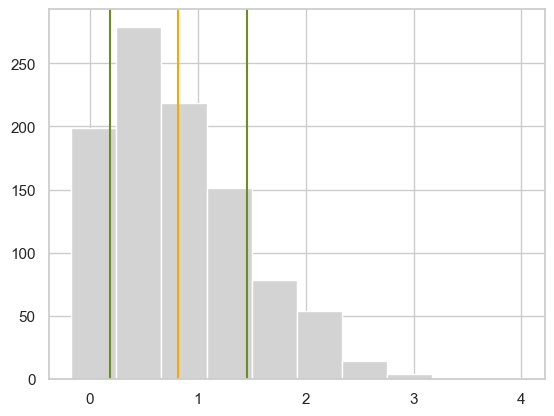

In [71]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color = 'orange')
plt.axvline(x = xbar + sigma, color = 'olivedrab')
plt.axvline(x = xbar - sigma, color = 'olivedrab')
_ = plt.hist(x, color = 'lightgrey')

Standard Error = a further derivation of standard deviation which is sigma divided by the square root of n

In [72]:
sigma / (len(x) ** (1/2))

0.019953342071505353

In [73]:
st.sem(x)  # defaults to 1 degree of freedom (n - 1), which can be ignored with larger data sets 

0.01996332623128527

In [74]:
st.sem(x, ddof=0)

0.01995334207150536

Measures of Relatedness -  if we have 2 vectors of the same length, x and y, where each element x is paired with a corresponding y, covariance provides a measure of how related the variables are to each other.

In [75]:
x = iris.sepal_length
y = iris.petal_length

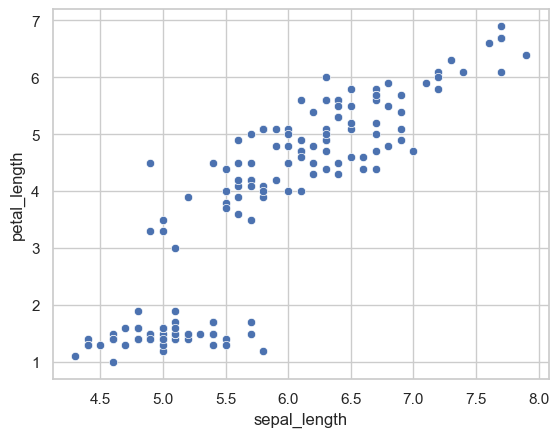

In [77]:
_ = sns.scatterplot(x=x, y = y)

In [80]:
n = len(x)

In [81]:
xbar = sum(x) / n
ybar = sum(y) / n

In [82]:
product = []
for i in range(n):
    product.append((x[i] - xbar) * (y[i] - ybar))

In [83]:
cov = sum(product) / n
cov

1.2658199999999995

There is a NumPy cov() method that returns a covariance matrix, which is a 2 x 2 matrix because x and y together decribe a 2-dimensional space.

In [84]:
np.cov(x, y, ddof = 0)

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

In [85]:
np.var(x)

0.6811222222222223

In [86]:
np.var(y)

3.0955026666666665

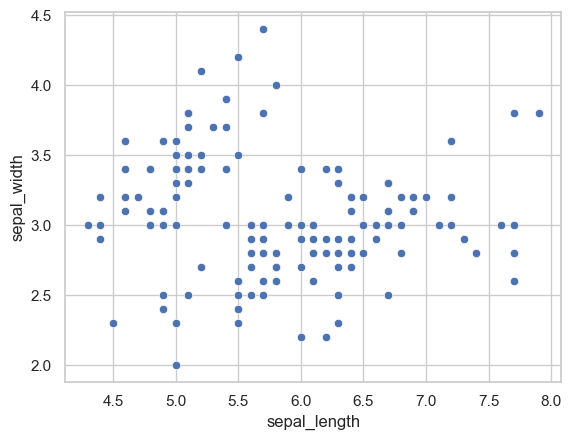

In [88]:
_ = sns.scatterplot(x=iris.sepal_length, y= iris.sepal_width)

In [89]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

Correlatopm builds on covariance and overcomes the drawback via rescaling, thereby measuring relatedness exclusively 

In [90]:
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

In [92]:
sigma_x = sigma_sq_x ** (1/2)
sigma_y = sigma_sq_y ** (1/2)

In [93]:
cov / (sigma_x * sigma_y)

-0.11756978087951572

In [94]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300195, pvalue=0.1518982607114483)

In [95]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

-0.11756978413300195

In [96]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

0.8717537758865833

Segment 2: Distributions in Machine Learning

Uniform Distribution - has constant probabilities across the entire range of values in its domain.

In [97]:
u = np.random.uniform(size=1000)

In [99]:
sns.set_style('ticks')

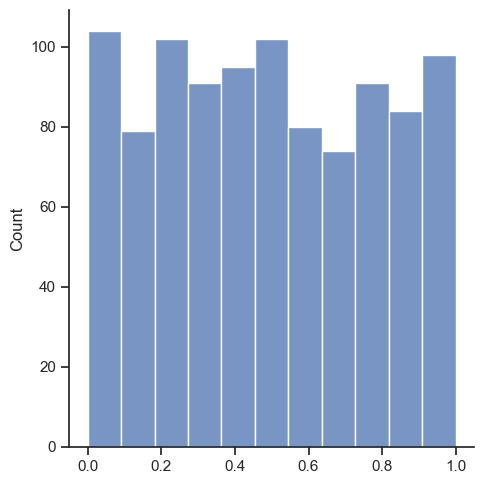

In [100]:
_ = sns.displot(x=u)

Real-World examples of uniform distributions include:
- Dice rolling (PMF)
- Card drawing (PMF)
- Model Hyperparameters
- Emission of radioactive particles
- Economic demand
- Analog to digital signal quantization errors

In [101]:
u = np.random.uniform(size=10000)

In [102]:
sns.set_style('ticks')

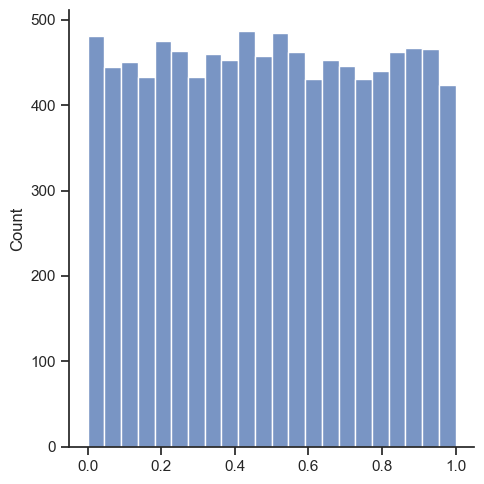

In [103]:
_ = sns.displot(x=u)

In [104]:
x = np.random.normal(size= 10000)

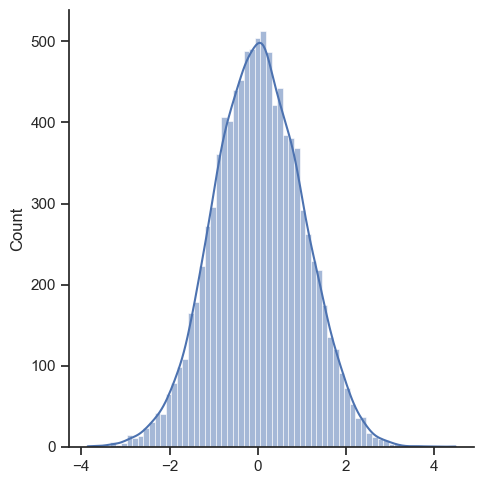

In [106]:
_ = sns.displot(x, kde=True)

Real-World Exammples of Normal Distribtuions include:
- Probability of heads across n trials.
- Sum of di(c)e rolls
- Height of adult men and women
- Education test scores such as SAT.

In [107]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range(n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count / n_experiments

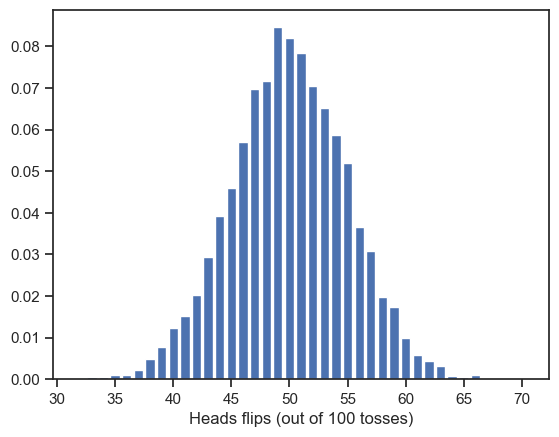

In [108]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

THe Central Limit Theorem - under appropriate conditions, the distribution of a normalized version of the sample means converges to a standard nromal distirbution.

In [109]:
x_sampkes = np.random.choice(x, size=10, replace=False)
x_sampkes

array([ 0.93650661, -0.40446229,  0.02570488, -0.86356836, -0.20194607,
       -0.93460891, -0.19368366,  0.83065569,  0.82354612,  0.05762276])

In [110]:
np.mean(x_sampkes)

0.007576677336026535

In [111]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

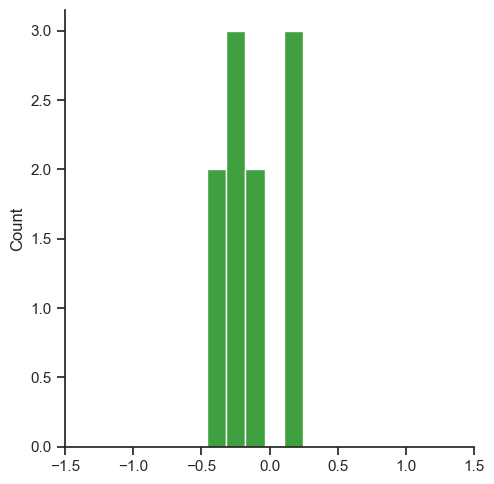

In [112]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

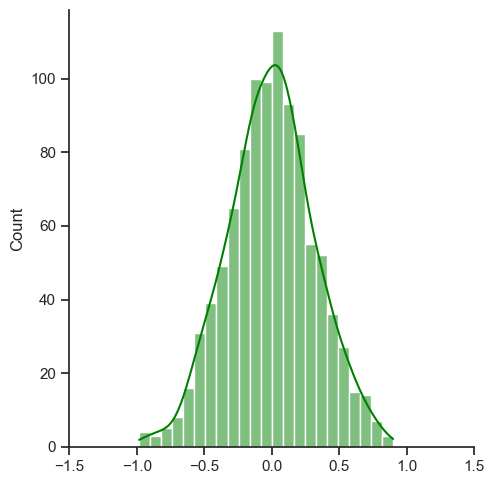

In [113]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

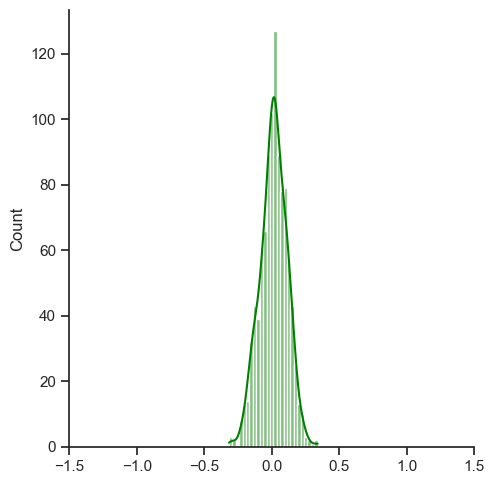

In [114]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Sample from a skewed distribution

In [115]:
s = st.skewnorm.rvs(10, size=10000)

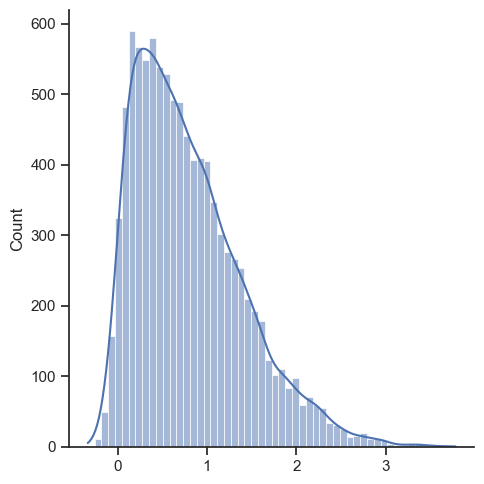

In [116]:
_ = sns.displot(s, kde=True)

In [117]:
x = np.random.exponential(scale=4, size=10000)

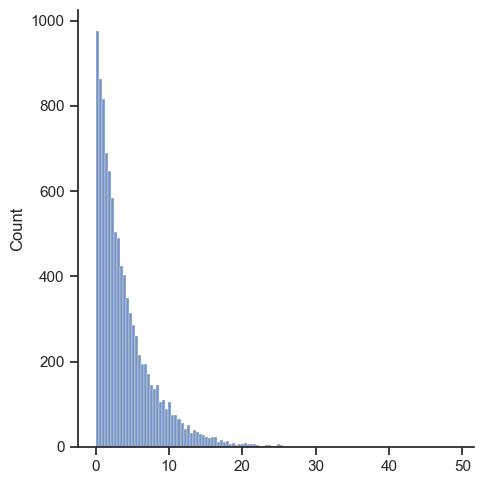

In [118]:
_ = sns.displot(x)

Binomial Distribution - a distribution based on a binary outcome such as coin flips.

Fair Coin (probability = 0.5)

In [126]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count / n_experiments

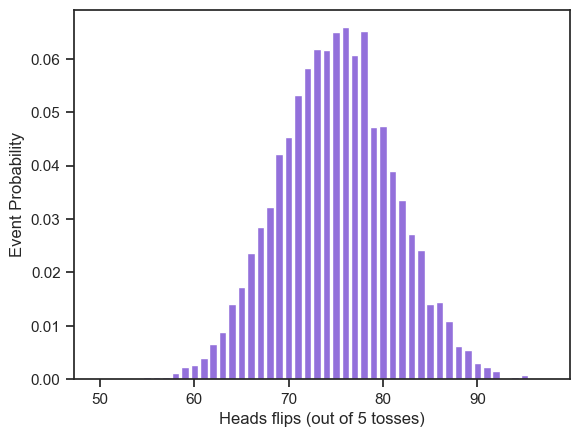

In [127]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event Probability')

In [128]:
np.random.binomial(1, 0.5)

1

Real World Examples of Binomial distribution:
- Making it to work on time
- Candidate being interviewed
- Probability of death from a virus or getting. 

Multinomial Distribution:
- a generalization of the binomial distribution to discrete random variables with more than 2 possible outcomes, e.g., the roll of a die

In [129]:
n = 1000

In [130]:
rolls = np.random.multinomial(n, [1/6.] * 6)
rolls

array([169, 148, 178, 176, 167, 162])

In [131]:
event_proba = rolls / n

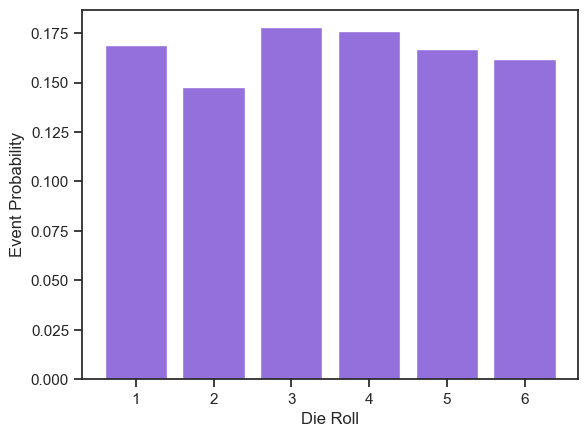

In [132]:
plt.bar(range(1, 7), event_proba, color = 'mediumpurple')
plt.xlabel('Die Roll')
_ = plt.ylabel('Event Probability')

In [138]:
np.random.multinomial(1, [1/6.] * 6)

array([1, 0, 0, 0, 0, 0])

Passion Distribution - is used to count data.

Real World Data examples of the Possion distribution include:
- Number of cars that drive by in 1 minute
- Number of guests at restaurants in an evening
- Number of new hires in 1 month

In [139]:
lam = 5
n = 1000

In [140]:
samples = np.random.poisson(lam, n)

In [141]:
samples[0:20]

array([6, 5, 5, 8, 3, 2, 6, 8, 4, 9, 4, 4, 4, 9, 5, 4, 9, 5, 3, 8])

In [142]:
x, x_count = np.unique(samples, return_counts=True)

In [143]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15])

In [144]:
x_count

array([  6,  28,  90, 142, 178, 160, 154, 101,  75,  39,  15,   6,   2,
         3,   1])

In [145]:
Px = x_count / n

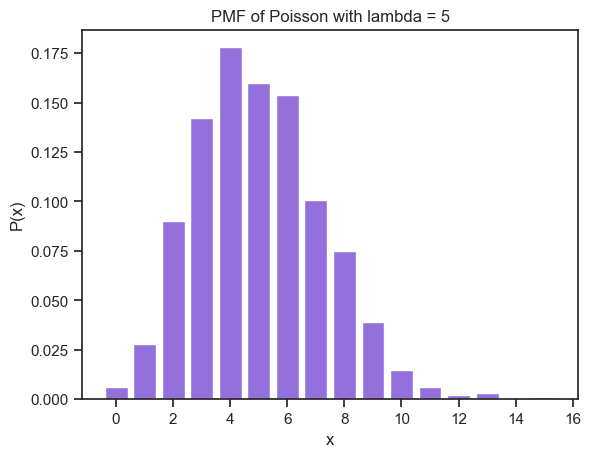

In [146]:
plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
_ = plt.ylabel('P(x)')

Mixture Distributions - allows us to set the coefficients of how likely 1 of 3 distributions is going to sample from.

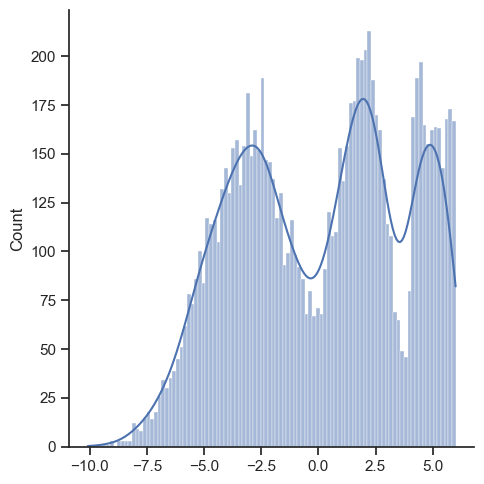

In [147]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

Segment 3: Information Theory

the Self Information formula is 

I(x) = -log(P(x))

In [148]:
def self_info(my_p):
    return -1*np.log(my_p)

In [150]:
self_info(0.1)

2.3025850929940455

In [151]:
self_info(0.5)

0.6931471805599453

In [152]:
self_info(0.5) + self_info(0.5)

1.3862943611198906

Depending on what logarithm base we use, the units of self-information vary. Most frequently, the units are either:

- nats:
    - Natural logarithm, as above with np.log()
    - Typical in ML
- bits:
    - Base-2 logarithm
    - A.k.a. shannons
    - Typical in computer science
So, the self-information of P(x) = 0.1 is ~2.3 nats.

Shannon and Differential Entropy

To quantify uncertainty about a probability distribution (as opposed to a single event), we can use Shannon entropy, which is denoted H(x) or H(P):

H(x) = $E_{xp}$[I(x)] = - $E_{xp}$[log(P(x))] 

Conveys the expected informational content associated with an event drawn from the distribution:

-  Low entropy:
    - Distribution is ~deterministic and outcomes are ~certain
    - E.g., weighted coin always lands heads up ()
- High entropy:
    - Outcomes are uncertain
    - Uniform distribution can be highest entropy
    - E.g., coin is as likely to be heads as tails ()
    
As an example, Shannon entropy for a binary random variable (e.g., coin flip) is:


In [153]:
def binary_entropy(my_p):
    return (my_p-1)*np.log(1-my_p) - my_p*np.log(my_p)

In [154]:
binary_entropy(0.00001)


0.00012512920464949012

In [155]:
binary_entropy(0.9)


0.3250829733914482

In [156]:
binary_entropy(0.5)


0.6931471805599453

In [157]:
p = np.linspace(0.001, 0.999, 1000)

In [158]:
H = binary_entropy(p)

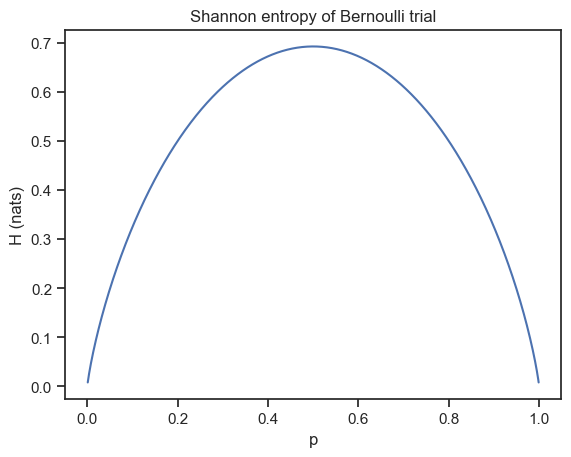

In [159]:
fig, ax = plt.subplots()
plt.title('Shannon entropy of Bernoulli trial')
plt.xlabel('p')
plt.ylabel('H (nats)')
_ = ax.plot(p,H)

Cross-Entropy

Cross-entropy is a concept derived from KL divergence. Its detail is beyond the scope of this series except to mention that it provides us with the cross-entropy cost function.

This cost function is ubiquitous in neural networks as it's the cost function of choice for predicting discrete, categorical outcomes. 

In [160]:
def cross_entropy(y, a):
    return -1*(y*np.log(a) + (1-y)*np.log(1-a))

In [161]:
cross_entropy(1, 0.9997)

0.00030004500900199243

In [162]:
cross_entropy(1, 0.3)

1.2039728043259361